In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Download historical stock data
ticker = "AAPL"  # Example: Apple stock
df = yf.download(ticker, start="2020-01-01", end="2025-06-15")

# Select relevant features
df = df[['Close', 'Volume']]
scaler = MinMaxScaler()
df[['Close', 'Volume']] = scaler.fit_transform(df[['Close', 'Volume']])
print(df.head())  # Display sample data


[*********************100%***********************]  1 of 1 completed

Price          Close    Volume
Ticker          AAPL      AAPL
Date                          
2020-01-02  0.089415  0.278335
2020-01-03  0.085954  0.305221
2020-01-06  0.088763  0.235949
2020-01-07  0.087092  0.212354
2020-01-08  0.092781  0.269901


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Prepare training data
X = df[['Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print("KNN Mean Absolute Error:", mae_knn)


KNN Mean Absolute Error: 0.12076328444718198


In [13]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("Linear Regression Mean Absolute Error:", mae_lr)


Linear Regression Mean Absolute Error: 0.12283739316563816


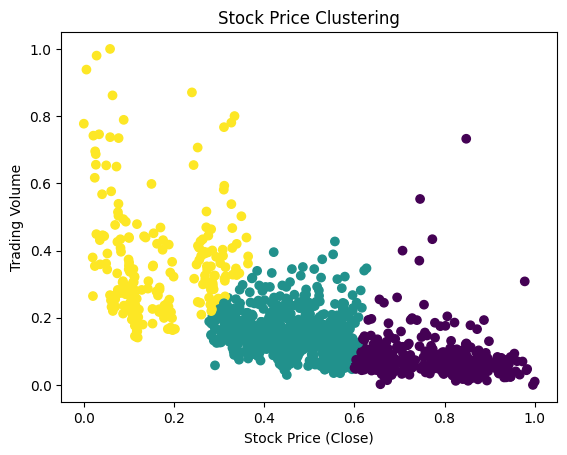

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Train K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Close', 'Volume']])

# Visualizing clusters
plt.scatter(df['Close'], df['Volume'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Stock Price (Close)")
plt.ylabel("Trading Volume")
plt.title("Stock Price Clustering")
plt.show()
